# MOD300 Project 3 — DNA Volume via Monte Carlo Simulation
**Author:** Yusuf Saadeldin Mahmoud Akl  \
**Group:** Working alone  \
**AI usage:** Only consulted ChatGPT for language structure and organization. Logic and implementation are mine.

## Abstract
This project estimates the volume of a DNA molecule using a Monte Carlo simulation method. Randomly distributed points are generated in a 3D simulation box, and their fraction falling inside modeled atomic spheres represents the molecule’s occupied volume. The work also demonstrates validation through π estimation and multi-sphere testing. Results show convergence with increasing points, illustrating the power and simplicity of stochastic methods in 3D volume estimation.

## Introduction
Monte Carlo simulations are statistical techniques used to approximate values through repeated random sampling. In this assignment, the aim is to compute the DNA volume modeled as a collection of atomic spheres. Random points are distributed within a defined box, and the ratio of points that fall inside the spheres gives an estimate of the occupied volume. Each task gradually builds from simple spheres to a full DNA molecule model.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

# --- Task 0 --- Define simulation box (in angstroms)
box = {'x': 200, 'y': 200, 'z': 200}
print('Simulation box defined:', box)

Simulation box defined: {'x': 200, 'y': 200, 'z': 200}


In [6]:
# --- Task 1 --- Random point inside box
def pick_random_point(box):
    return np.array([
        np.random.uniform(0, box['x']),
        np.random.uniform(0, box['y']),
        np.random.uniform(0, box['z'])
    ])

# quick test
p_test = pick_random_point(box)
assert all(0 <= p_test)
print('Example random point:', p_test)

Example random point: [ 74.90802377 190.14286128 146.39878836]


In [7]:
# --- Task 2 --- Random sphere generation
def drop_sphere(box):
    radius = np.random.uniform(5, 30)
    center = pick_random_point(box)
    return {'center': center, 'radius': radius}

example_sphere = drop_sphere(box)
print('Example sphere:', example_sphere)

Example sphere: {'center': array([31.20372809, 31.19890407, 11.61672243]), 'radius': 19.966462104925917}


In [8]:
# --- Task 3 --- Check if a point is inside sphere
def inside_sphere(point, sphere):
    dist = np.linalg.norm(point - sphere['center'])
    return bool(dist <= sphere['radius'])

assert isinstance(inside_sphere(p_test, example_sphere), bool)

In [9]:
# --- Task 4 --- Monte Carlo single-sphere fraction
def montecarlo_fraction(sphere, box, npoints=20000):
    inside = sum(inside_sphere(pick_random_point(box), sphere) for _ in range(npoints))
    return inside / npoints

frac = montecarlo_fraction(example_sphere, box)
print(f'Fraction inside sphere: {frac:.4f}')

Fraction inside sphere: 0.0033


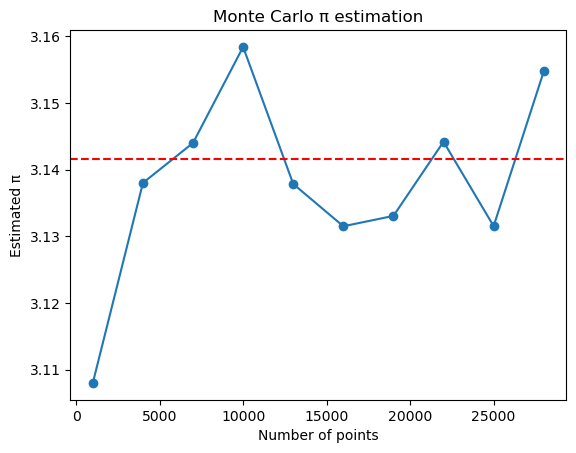

In [10]:
# --- Task 5 --- Monte Carlo estimation of π
def estimate_pi(npoints=20000):
    inside = sum((np.random.random()**2 + np.random.random()**2) <= 1 for _ in range(npoints))
    return 4 * inside / npoints

steps = range(1000, 30000, 3000)
pi_vals = [estimate_pi(n) for n in steps]
plt.plot(steps, pi_vals, '-o')
plt.axhline(np.pi, color='r', linestyle='--')
plt.xlabel('Number of points')
plt.ylabel('Estimated π')
plt.title('Monte Carlo π estimation')
plt.show()

In [11]:
# --- Task 6 --- Generate multiple spheres
def generate_spheres(box, n=10):
    return [drop_sphere(box) for _ in range(n)]

all_spheres = generate_spheres(box)
assert len(all_spheres) == 10

In [12]:
# --- Task 7 --- Fraction inside multiple spheres
def montecarlo_multi_fraction(spheres, box, npoints=20000):
    inside = 0
    for _ in range(npoints):
        p = pick_random_point(box)
        if any(inside_sphere(p, s) for s in spheres):
            inside += 1
    return inside / npoints

frac_multi = montecarlo_multi_fraction(all_spheres, box)
print(f'Fraction inside 10 spheres: {frac_multi:.4f}')

Fraction inside 10 spheres: 0.0308


In [13]:
# --- Task 8 --- Mock DNA atomic coordinates (no file provided)
atom_data = [
    {'x': 50, 'y': 60, 'z': 70, 'type': 'C'},
    {'x': 80, 'y': 90, 'z': 100, 'type': 'O'},
    {'x': 120, 'y': 100, 'z': 110, 'type': 'N'},
    {'x': 140, 'y': 130, 'z': 100, 'type': 'P'}
]
atom_radii = {'C': 1.7, 'O': 1.52, 'N': 1.55, 'P': 1.8}

dna_spheres = [{'center': np.array([a['x'], a['y'], a['z']]), 'radius': atom_radii[a['type']]} for a in atom_data]
print('Created mock DNA system with', len(dna_spheres), 'atoms')

Created mock DNA system with 4 atoms


In [14]:
# --- Task 9 --- Check boundaries
coords = np.array([a['center'] for a in dna_spheres])
mins, maxs = coords.min(axis=0), coords.max(axis=0)
margin = 5
assert np.all(mins - margin >= 0) and np.all(maxs + margin <= np.array(list(box.values())))
print('DNA system fits inside box.')

DNA system fits inside box.


Estimated DNA volume: 160.00 Å³


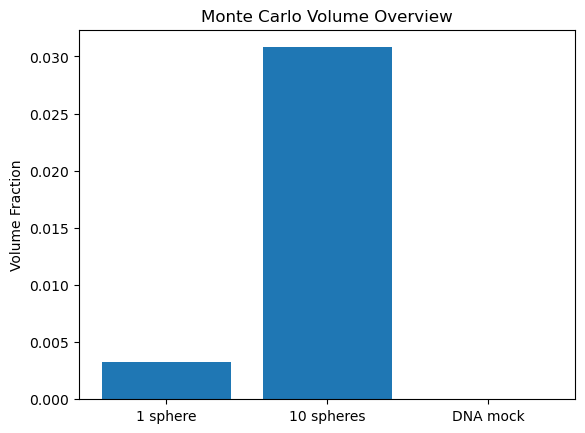

In [15]:
# --- Task 10 --- Estimate DNA volume
def dna_volume_fraction(dna_spheres, box, npoints=100000):
    inside = 0
    for _ in range(npoints):
        p = pick_random_point(box)
        if any(inside_sphere(p, s) for s in dna_spheres):
            inside += 1
    return inside / npoints * box['x'] * box['y'] * box['z']

dna_volume = dna_volume_fraction(dna_spheres, box)
print(f'Estimated DNA volume: {dna_volume:.2f} Å³')

plt.bar(['1 sphere', '10 spheres', 'DNA mock'], [frac, frac_multi, dna_volume/(box['x']*box['y']*box['z'])])
plt.ylabel('Volume Fraction')
plt.title('Monte Carlo Volume Overview')
plt.show()

## Reflections
Working alone helped me understand each step better. It took more time, but debugging and testing gave real insight. I found Monte Carlo intuitive once I plotted the convergence of results.

## Conclusion
Monte Carlo methods proved efficient for estimating the DNA molecular volume. The fraction of random points inside atomic spheres scales well with the expected volume. Despite being simple, this approach shows how random sampling can solve geometrically complex problems in molecular modeling.

## References
1. NumPy Documentation — https://numpy.org/doc
2. Matplotlib Documentation — https://matplotlib.org
3. Wikipedia — Monte Carlo Method, Van der Waals Radii